<a href="https://colab.research.google.com/github/mshilpaa/EVA4/blob/master/Session%2013/yolo_using_openCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import numpy as np

In [0]:
from google.colab import drive

In [4]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Weight file: it’s the trained model, the core of the algorythm to detect the objects.

Cfg file: it’s the configuration file, where there are all the settings of the algorythm.

Name files: contains the name of the objects that the algorythm can detect.

In [0]:
# Load Yolo
net = cv2.dnn.readNet("/content/gdrive/My Drive/yolo/yolov3.weights", "/content/gdrive/My Drive/yolo/yolov3.cfg")
classes = []
with open("/content/gdrive/My Drive/yolo/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [5]:
print(classes)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
print(len(classes))

80


In [7]:
print(layer_names)

['conv_0', 'bn_0', 'relu_0', 'conv_1', 'bn_1', 'relu_1', 'conv_2', 'bn_2', 'relu_2', 'conv_3', 'bn_3', 'relu_3', 'shortcut_4', 'conv_5', 'bn_5', 'relu_5', 'conv_6', 'bn_6', 'relu_6', 'conv_7', 'bn_7', 'relu_7', 'shortcut_8', 'conv_9', 'bn_9', 'relu_9', 'conv_10', 'bn_10', 'relu_10', 'shortcut_11', 'conv_12', 'bn_12', 'relu_12', 'conv_13', 'bn_13', 'relu_13', 'conv_14', 'bn_14', 'relu_14', 'shortcut_15', 'conv_16', 'bn_16', 'relu_16', 'conv_17', 'bn_17', 'relu_17', 'shortcut_18', 'conv_19', 'bn_19', 'relu_19', 'conv_20', 'bn_20', 'relu_20', 'shortcut_21', 'conv_22', 'bn_22', 'relu_22', 'conv_23', 'bn_23', 'relu_23', 'shortcut_24', 'conv_25', 'bn_25', 'relu_25', 'conv_26', 'bn_26', 'relu_26', 'shortcut_27', 'conv_28', 'bn_28', 'relu_28', 'conv_29', 'bn_29', 'relu_29', 'shortcut_30', 'conv_31', 'bn_31', 'relu_31', 'conv_32', 'bn_32', 'relu_32', 'shortcut_33', 'conv_34', 'bn_34', 'relu_34', 'conv_35', 'bn_35', 'relu_35', 'shortcut_36', 'conv_37', 'bn_37', 'relu_37', 'conv_38', 'bn_38', 're

In [10]:
output_layers

['yolo_82', 'yolo_94', 'yolo_106']

different colors for bounding box of each class

In [8]:
colors.shape

(80, 3)

In [0]:
# Loading image
img = cv2.imread("/content/gdrive/My Drive/yolo/img2.jpg")

In [12]:
img.shape

(2322, 4128, 3)

This image should be resized since YOLO accepts three sizes:

320×320 it’s small so less accuracy but better speed

609×609 it’s bigger so high accuracy and slow speed

416×416 it’s in the middle and you get a bit of both.

In [0]:
img = cv2.resize(img, None, fx=0.4, fy=0.4) # o/p img size = (img_row*fy, img_col*fx)
height, width, channels = img.shape

In [14]:
img.shape

(929, 1651, 3)

In [15]:
np.mean(img)/255

0.5131486774557985

In [0]:
# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

In [17]:
blob.shape

(1, 3, 416, 416)

The outs contains the result of the detection. Outs is an array that conains all the informations about objects detected, their position and the confidence about the detection.

In [18]:
len(outs)

3

In [19]:
outs[0].shape

(507, 85)

yolo v3 uses 3 anchor boxes 
thus, o/p of last layer is 13* 13 *3 = 507

80 classes

5 bounding box parameters : x,y,w,h,objectness parameter.

Thus, 80+5 = 85

In [20]:
outs[0]

array([[0.0487074 , 0.05221933, 0.39136454, ..., 0.        , 0.        ,
        0.        ],
       [0.04826691, 0.03136925, 0.2745634 , ..., 0.        , 0.        ,
        0.        ],
       [0.04665551, 0.03841195, 0.815759  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.96670604, 0.9538476 , 0.43024853, ..., 0.        , 0.        ,
        0.        ],
       [0.9673909 , 0.9633544 , 0.3037137 , ..., 0.        , 0.        ,
        0.        ],
       [0.96594167, 0.96487343, 0.8357228 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [21]:
outs[0][0]

array([4.8707403e-02, 5.2219331e-02, 3.9136454e-01, 1.3796103e-01,
       5.1492395e-07, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e

In [0]:
# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:] # contains class value
        class_id = np.argmax(scores) # get the max class value
        confidence = scores[class_id] # get the class value
        if confidence > 0.5:          # check if the class value is above threshold
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [0]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, score_threshold= 0.5, nms_threshold=0.4)

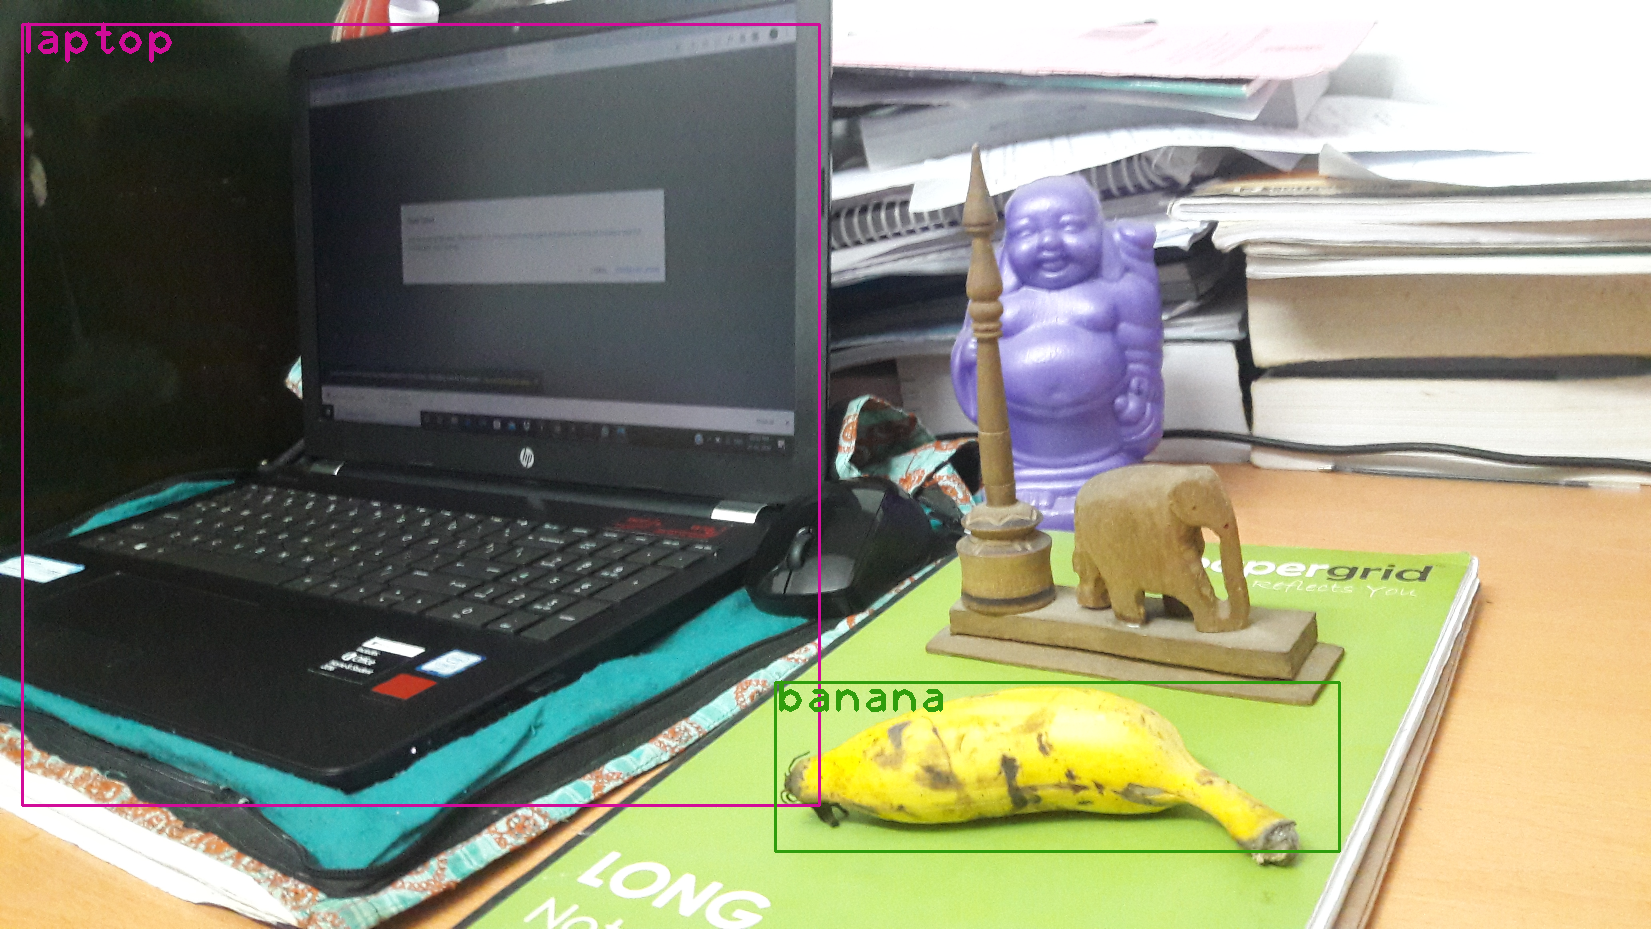

In [24]:
from google.colab.patches import cv2_imshow
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)
cv2_imshow( img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [0]:
from urllib.request import urlopen

def yolo_detection(image,url=False):
  if url:
   resp = urlopen(image)
   image = np.asarray(bytearray(resp.read()), dtype="uint8")
   img = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
  else:
    img = cv2.imread(image)
    
  # print("img.shape",img.shape)
  img = cv2.resize(img, None, fx=0.4, fy=0.4)
  height, width, channels = img.shape
  # print("img.shape after resize",img.shape)

  # Detecting objects
  blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
  # print("blob.shape",blob.shape)
  net.setInput(blob)
  outs = net.forward(output_layers)

  # Showing informations on the screen
  class_ids = []
  confidences = []
  boxes = []
  for out in outs:
      for detection in out:
          scores = detection[5:]
          class_id = np.argmax(scores)
          confidence = scores[class_id]
          if confidence > 0.5:
              # Object detected
              center_x = int(detection[0] * width)
              center_y = int(detection[1] * height)
              w = int(detection[2] * width)
              h = int(detection[3] * height)

              # Rectangle coordinates
              x = int(center_x - w / 2)
              y = int(center_y - h / 2)

              boxes.append([x, y, w, h])
              confidences.append(float(confidence))
              class_ids.append(class_id)

  indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
  # print(indexes)
  font = cv2.FONT_HERSHEY_PLAIN
  for i in range(len(boxes)):
      if i in indexes:
          x, y, w, h = boxes[i]
          label = str(classes[class_ids[i]])
          color = colors[i]
          cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
          cv2.putText(img, label, (x, y + 30), font, 2, color, 2)


  cv2_imshow(img)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

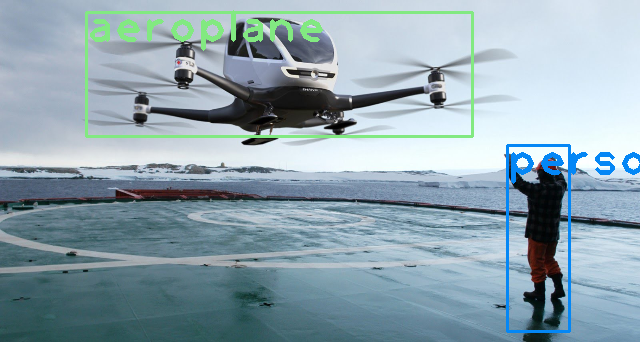

In [17]:
url = 'https://beta.techcrunch.com/wp-content/uploads/2016/12/unnamed-2.jpg'
yolo_detection(url,url=True)


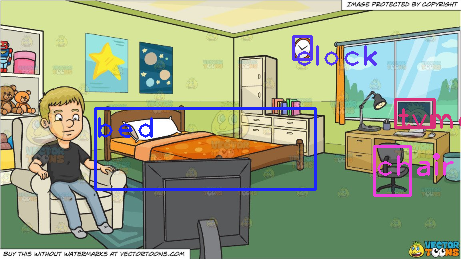

In [35]:
yolo_detection('/content/gdrive/My Drive/yolo/img3.jpeg')

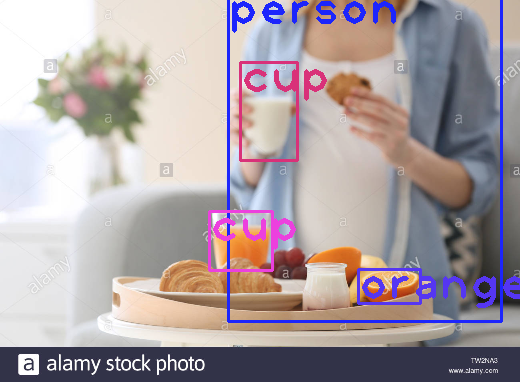

In [13]:
url = "https://c8.alamy.com/comp/TW2NA3/tray-with-healthy-breakfast-and-blurred-pregnant-woman-on-background-TW2NA3.jpg"
yolo_detection(url,url=True)